In [1]:
%matplotlib inline
import os
import re
import glob
import pickle
import numpy as np
from matplotlib import pyplot as plt
from mintpy.objects import timeseries
from mintpy.utils import ptime, readfile, utils as ut, plot as pp
from unwrap_error.simulation import iono
figsize = [12, 4]

proj_dir = '/Users/yunjunz/data/ChileSenAT149'
os.chdir(proj_dir)
print('Go to directory', proj_dir)

version = 1.0  #
version = 2.0  # GIM/TOP/SUBTEC_TPP
version = 2.1  # GIMTEC_TGT, TOPTEC_TPP, (GIMTEC_TGT - TOPTEC_TPP)
out_file = os.path.join(proj_dir, 'offset_comp/gim_tec_v{}.pickle'.format(version))
print('output file: {}'.format(out_file))

# config for GIM TEC data
iono_height = 450e3   # height of the ionospheric piercing point in m
gim_tec_dir = os.path.join(proj_dir, 'GIM_TEC_v{}'.format(int(version)))
print('GIM TEC data dir: {}'.format(gim_tec_dir))

Go to directory /Users/yunjunz/data/ChileSenAT149
output file: /Users/yunjunz/data/ChileSenAT149/offset_comp/gim_tec_v2.1.pickle
GIM TEC data dir: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2


### 1.1 grab the geometry info

In [2]:
geom_file = os.path.join(proj_dir, 'mintpyOffset/inputs/geometryRadar.h5')
atr = readfile.read_attribute(geom_file)
len2 = int(int(atr['LENGTH']) / 2)
wid2 = int(int(atr['WIDTH']) / 2)
box = (wid2, len2, wid2+1, len2+1)

# geometry on the ground
head_angle = float(atr['HEADING'])
inc_angle_ground = readfile.read(geom_file, datasetName='incidenceAngle', box=box)[0][0,0]
lat_ground = readfile.read(geom_file, datasetName='latitude',  box=box)[0][0,0]
lon_ground = readfile.read(geom_file, datasetName='longitude', box=box)[0][0,0]

# geometry at the ionospheric shell
inc_angle_iono = ut.incidence_angle_ground2iono_shell_along_los(inc_angle_ground, iono_height=iono_height)
lat_iono, lon_iono = ut.lalo_ground2iono_shell_along_los(lat_ground, lon_ground,
                                                         inc_angle=inc_angle_ground,
                                                         head_angle=head_angle,
                                                         iono_height=iono_height)

print('heading   angle: {:.1f} deg'.format(head_angle))
print('incidence angle on the ground: {:.1f} deg'.format(inc_angle_ground))
print('incidence angle at ionosphere: {:.1f} deg'.format(inc_angle_iono))
print('SAR scene center on the ground in lat/lon: {:.1f}/{:.1f}'.format(lat_ground, lon_ground))
print('SAR scene center at ionosphere in lat/lon: {:.1f}/{:.1f}'.format(lat_iono, lon_iono))
print('SAR acquisition time UTC: {} hours'.format(float(atr['CENTER_LINE_UTC']) / 3600.))

heading   angle: -13.9 deg
incidence angle on the ground: 39.7 deg
incidence angle at ionosphere: 36.6 deg
SAR scene center on the ground in lat/lon: -21.0/-68.4
SAR scene center at ionosphere in lat/lon: -18.1/-69.2
SAR acquisition time UTC: 23.1075 hours


### 1.2 read GIM TEC and calculate the range delay

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20150624.txt.dt
distance to nearest topTEC obs: 1.8 deg


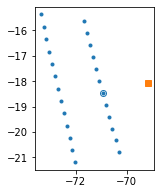

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20150928.txt.dt
distance to nearest topTEC obs: 1.4 deg


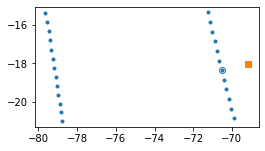

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20151115.txt.dt
distance to nearest topTEC obs: 2.3 deg


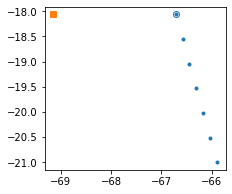

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20151209.txt.dt
distance to nearest topTEC obs: 0.4 deg


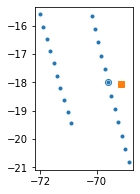

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20160102.txt.dt
distance to nearest topTEC obs: 3.0 deg


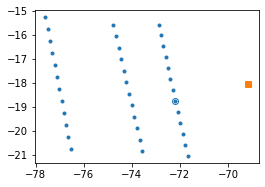

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20160126.txt.dt
distance to nearest topTEC obs: 3.4 deg


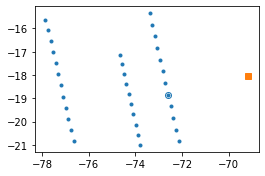

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20160314.txt.dt
distance to nearest topTEC obs: 3.2 deg


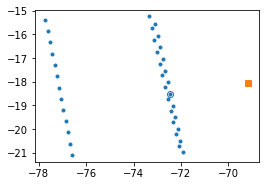

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20160407.txt.dt
distance to nearest topTEC obs: 9.9 deg


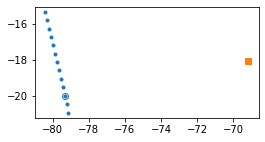

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20160501.txt.dt
distance to nearest topTEC obs: 4.9 deg


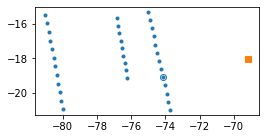

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20160525.txt.dt
distance to nearest topTEC obs: 6.3 deg


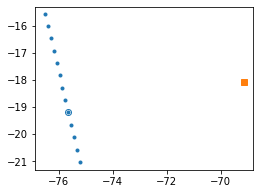

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20160712.txt.dt
distance to nearest topTEC obs: 4.8 deg


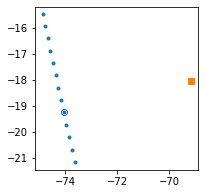

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20160805.txt.dt
distance to nearest topTEC obs: 1.5 deg


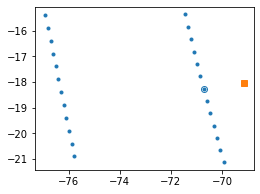

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20160829.txt.dt
distance to nearest topTEC obs: 3.0 deg


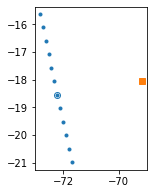

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20161022.txt.dt
distance to nearest topTEC obs: 0.3 deg


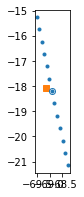

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20161115.txt.dt
distance to nearest topTEC obs: 0.1 deg


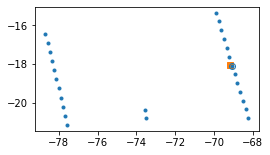

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20170102.txt.dt
distance to nearest topTEC obs: 4.1 deg


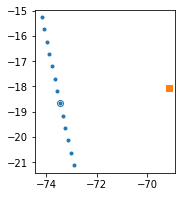

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20170126.txt.dt
distance to nearest topTEC obs: 0.9 deg


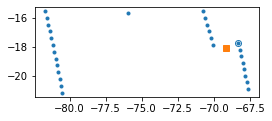

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20170219.txt.dt
distance to nearest topTEC obs: 4.3 deg


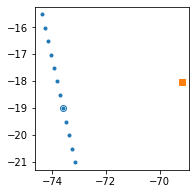

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20170303.txt.dt
distance to nearest topTEC obs: 2.7 deg


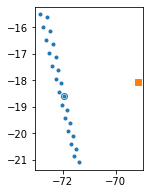

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20170315.txt.dt
distance to nearest topTEC obs: 1.1 deg


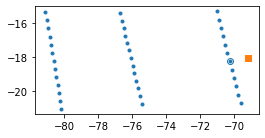

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20170526.txt.dt
distance to nearest topTEC obs: 1.4 deg


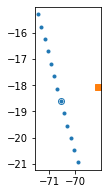

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20170607.txt.dt
distance to nearest topTEC obs: 1.9 deg


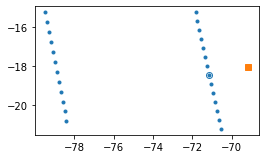

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20170619.txt.dt
distance to nearest topTEC obs: 8.5 deg


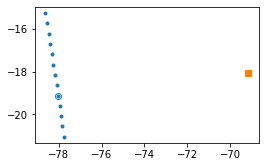

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20170701.txt.dt
distance to nearest topTEC obs: 4.6 deg


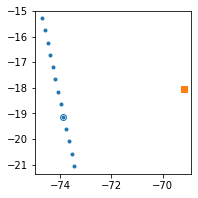

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20170713.txt.dt
distance to nearest topTEC obs: 2.9 deg


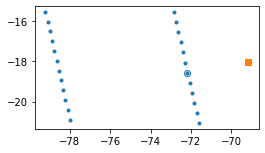

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20170725.txt.dt
distance to nearest topTEC obs: 1.4 deg


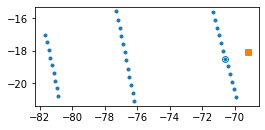

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20170806.txt.dt
distance to nearest topTEC obs: 5.8 deg


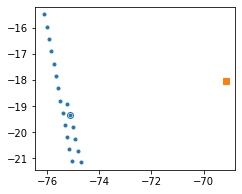

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20170818.txt.dt
distance to nearest topTEC obs: 3.2 deg


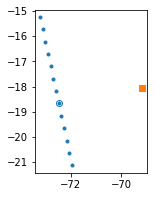

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20170830.txt.dt
distance to nearest topTEC obs: 1.5 deg


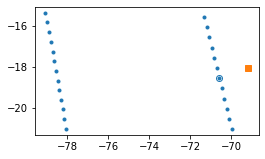

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20170911.txt.dt
distance to nearest topTEC obs: 9.5 deg


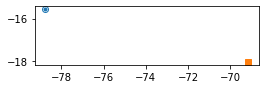

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20170923.txt.dt
distance to nearest topTEC obs: 3.6 deg


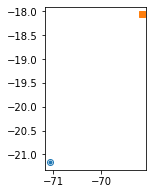

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20171005.txt.dt
distance to nearest topTEC obs: 0.2 deg


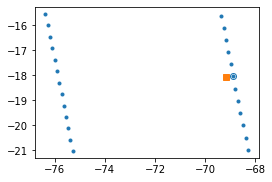

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20171017.txt.dt
distance to nearest topTEC obs: 2.4 deg


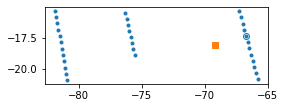

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20171029.txt.dt
distance to nearest topTEC obs: 5.3 deg


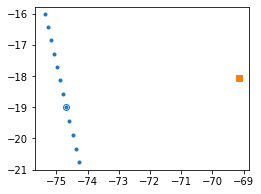

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20171110.txt.dt
distance to nearest topTEC obs: 0.8 deg


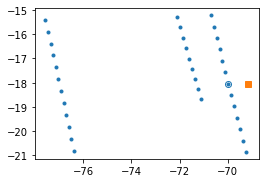

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20171122.txt.dt
distance to nearest topTEC obs: 2.8 deg


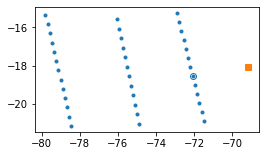

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20171204.txt.dt
distance to nearest topTEC obs: 3.0 deg


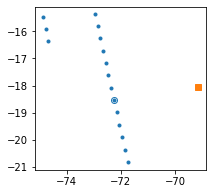

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20171216.txt.dt
distance to nearest topTEC obs: 4.6 deg


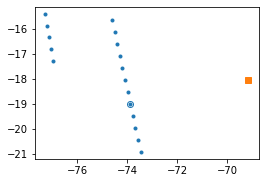

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20171228.txt.dt
distance to nearest topTEC obs: 2.1 deg


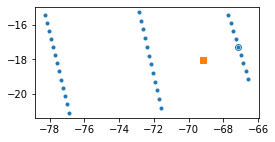

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20180202.txt.dt
distance to nearest topTEC obs: 5.7 deg


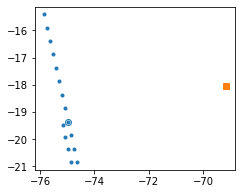

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20180214.txt.dt
distance to nearest topTEC obs: 3.4 deg


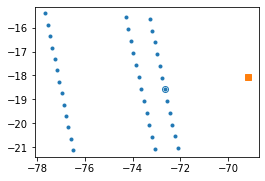

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20180226.txt.dt
distance to nearest topTEC obs: 1.7 deg


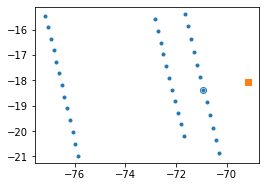

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20180310.txt.dt
distance to nearest topTEC obs: 10.1 deg


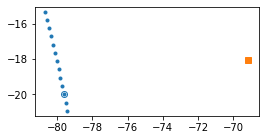

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20180322.txt.dt
distance to nearest topTEC obs: 4.6 deg


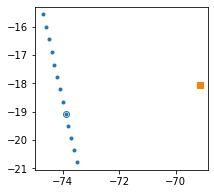

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20180403.txt.dt
distance to nearest topTEC obs: 4.9 deg


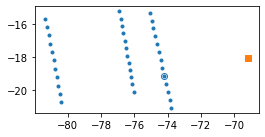

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20180415.txt.dt
distance to nearest topTEC obs: 4.7 deg


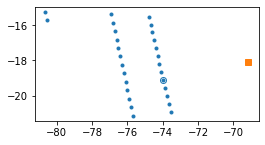

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20180509.txt.dt
distance to nearest topTEC obs: 1.1 deg


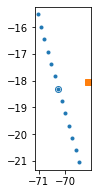

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20180521.txt.dt
distance to nearest topTEC obs: 1.8 deg


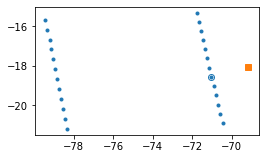

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20180602.txt.dt
distance to nearest topTEC obs: 8.3 deg


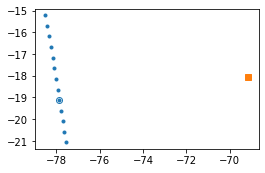

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20180614.txt.dt
distance to nearest topTEC obs: 5.0 deg


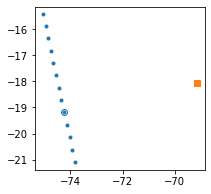

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20180626.txt.dt
distance to nearest topTEC obs: 1.8 deg


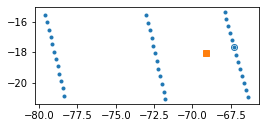

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20180708.txt.dt
distance to nearest topTEC obs: 1.6 deg


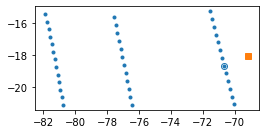

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20180720.txt.dt
distance to nearest topTEC obs: 6.3 deg


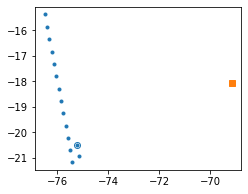

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20180801.txt.dt
distance to nearest topTEC obs: 3.3 deg


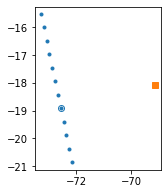

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20180813.txt.dt
distance to nearest topTEC obs: 1.4 deg


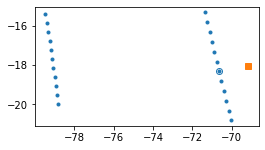

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20180825.txt.dt
distance to nearest topTEC obs: 2.2 deg


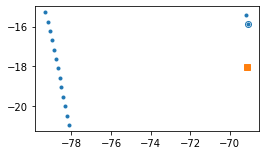

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20180906.txt.dt
distance to nearest topTEC obs: 8.1 deg


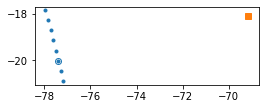

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20180918.txt.dt
distance to nearest topTEC obs: 0.4 deg


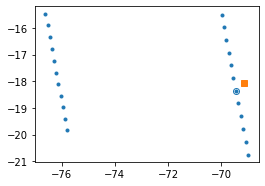

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20180930.txt.dt
distance to nearest topTEC obs: 2.0 deg


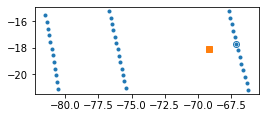

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20181012.txt.dt
distance to nearest topTEC obs: 2.1 deg


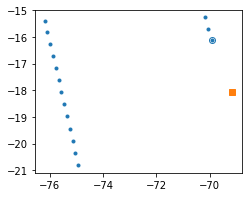

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20181105.txt.dt
distance to nearest topTEC obs: 2.6 deg


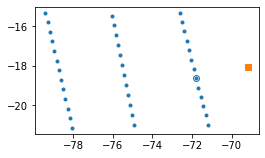

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20181129.txt.dt
distance to nearest topTEC obs: 5.7 deg


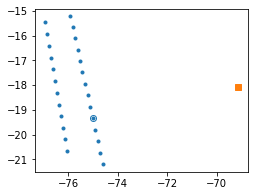

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20181223.txt.dt
distance to nearest topTEC obs: 1.2 deg


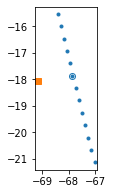

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20190104.txt.dt
distance to nearest topTEC obs: 4.8 deg


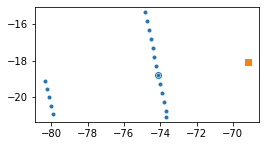

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20190128.txt.dt
distance to nearest topTEC obs: 0.1 deg


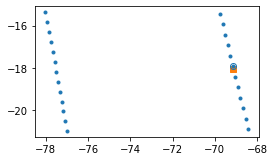

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20190209.txt.dt
distance to nearest topTEC obs: 2.0 deg


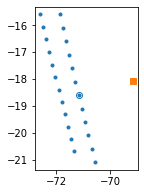

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20190221.txt.dt
distance to nearest topTEC obs: 0.2 deg


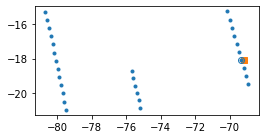

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20190317.txt.dt
distance to nearest topTEC obs: 4.5 deg


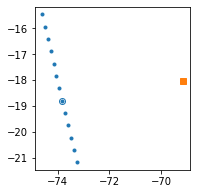

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20190329.txt.dt
distance to nearest topTEC obs: 4.3 deg


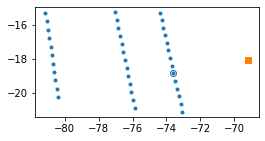

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20190410.txt.dt
distance to nearest topTEC obs: 6.5 deg


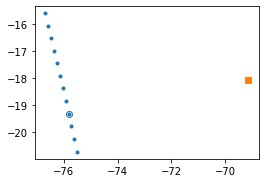

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20190422.txt.dt
distance to nearest topTEC obs: 0.9 deg


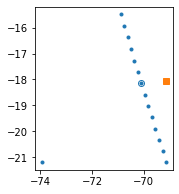

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20190504.txt.dt
distance to nearest topTEC obs: 1.9 deg


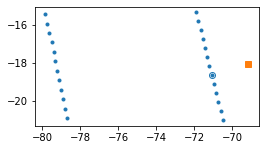

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20190516.txt.dt
distance to nearest topTEC obs: 2.1 deg


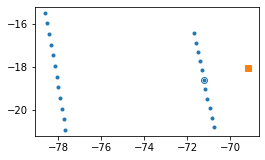

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20190528.txt.dt
distance to nearest topTEC obs: 5.4 deg


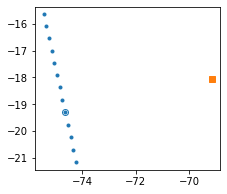

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20190609.txt.dt
distance to nearest topTEC obs: 2.4 deg


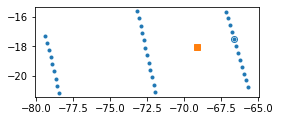

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20190621.txt.dt
distance to nearest topTEC obs: 1.7 deg


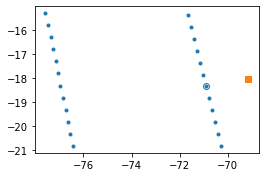

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20190703.txt.dt
distance to nearest topTEC obs: 6.2 deg


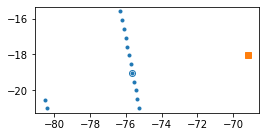

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20190715.txt.dt
distance to nearest topTEC obs: 4.2 deg


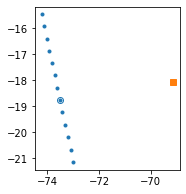

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20190727.txt.dt
distance to nearest topTEC obs: 2.2 deg


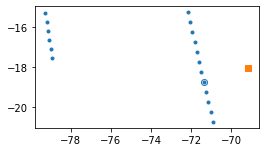

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20190808.txt.dt
distance to nearest topTEC obs: 0.4 deg


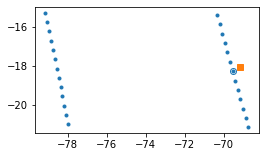

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20190820.txt.dt
distance to nearest topTEC obs: 8.2 deg


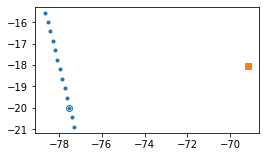

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20190901.txt.dt
distance to nearest topTEC obs: 1.5 deg


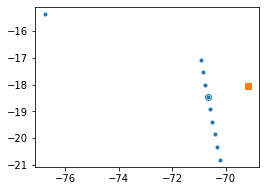

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20190913.txt.dt
distance to nearest topTEC obs: 0.8 deg


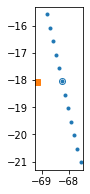

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20191007.txt.dt
distance to nearest topTEC obs: 1.0 deg


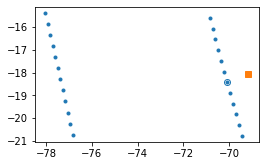

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20191019.txt.dt
distance to nearest topTEC obs: 1.3 deg


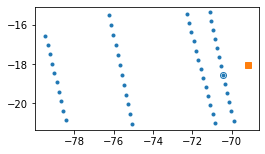

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20191031.txt.dt
distance to nearest topTEC obs: 5.0 deg


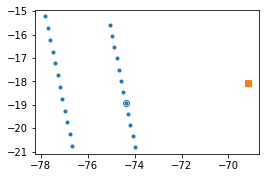

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20191112.txt.dt
distance to nearest topTEC obs: 6.0 deg


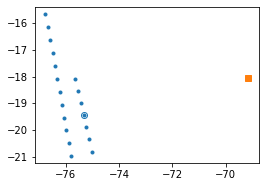

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20191124.txt.dt
distance to nearest topTEC obs: 3.7 deg


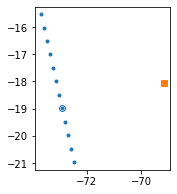

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20191206.txt.dt
distance to nearest topTEC obs: 2.2 deg


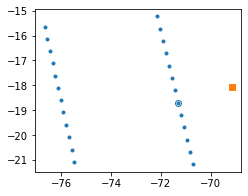

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20191218.txt.dt
distance to nearest topTEC obs: 1.7 deg


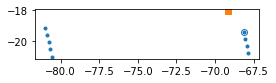

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20191230.txt.dt
distance to nearest topTEC obs: 4.1 deg


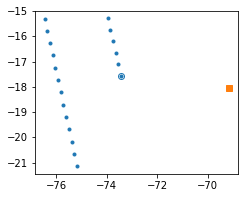

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20200123.txt.dt
distance to nearest topTEC obs: 1.8 deg


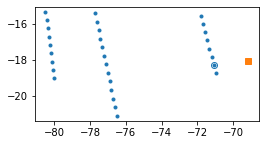

read JPL GIM TEC data from file: /Users/yunjunz/data/ChileSenAT149/GIM_TEC_v2/subtec_sent1_20200228.txt.dt
distance to nearest topTEC obs: 4.8 deg


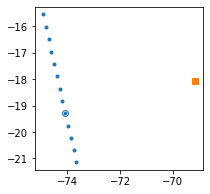

Done.


In [3]:
## calculate the vertical TEC
date_list = []
tfiles = sorted(glob.glob(os.path.join(gim_tec_dir, 'subtec_sent1*.txt.dt')))
for tfile in tfiles:
    fname = os.path.basename(tfile)
    date_str = re.findall('\d{8}', fname)[0]
    date_list.append(date_str)
num_date = len(date_list)

gim_tec = np.zeros(num_date, dtype=np.float32)
top_tec = np.zeros(num_date, dtype=np.float32)
sub_tec = np.zeros(num_date, dtype=np.float32)
dist_deg = np.zeros(num_date, dtype=np.float32)

for i in range(num_date):
    (gim_tec[i],
     top_tec[i],
     sub_tec[i],
     dist_deg[i]) = iono.get_gim_tec_value(gim_tec_dir, date_list[i], lat_iono, lon_iono, version=version, display=True)
print('Done.')

### 2. save to pickle file

In [4]:
# gather all into gim_tec dict
tec_dict = {}
tec_dict['date'] = np.array(date_list)
tec_dict['time'] = np.array(ptime.date_list2vector(date_list)[0])
tec_dict['TEC'] = gim_tec
tec_dict['topTEC'] = top_tec
tec_dict['subTEC'] = sub_tec
tec_dict['dist_deg'] = dist_deg

## calculate the predicted range delay
# L-band: 1.2575 GHz (ALOS2, NISAR-L)
# S-band: 3.2 GHz (NISAR-S)
# C-band: 5.405 GHz (Sentinel-1)
for band, freq in zip(['Cband', 'Sband', 'Lband'],
                      [5.405e9, 3.2e9, 1.2575e9]):
    for tec_type in ['TEC', 'subTEC', 'topTEC']:
        key = 'range_delay4{b}_{t}'.format(b=band, t=tec_type)
        print('calc {:<25} from {:<15}'.format(key, tec_type))
        off = iono.vtec2range_delay(tec_dict[tec_type], inc_angle_iono, freq=freq)
        tec_dict[key] = off

## save to file
with open(out_file, 'wb') as f:
    pickle.dump(tec_dict, f)
    print('save data to file: {}'.format(out_file))

calc range_delay4Cband_TEC     from TEC            
calc range_delay4Cband_subTEC  from subTEC         
calc range_delay4Cband_topTEC  from topTEC         
calc range_delay4Sband_TEC     from TEC            
calc range_delay4Sband_subTEC  from subTEC         
calc range_delay4Sband_topTEC  from topTEC         
calc range_delay4Lband_TEC     from TEC            
calc range_delay4Lband_subTEC  from subTEC         
calc range_delay4Lband_topTEC  from topTEC         
save data to file: /Users/yunjunz/data/ChileSenAT149/offset_comp/gim_tec_v2.1.pickle


### 3. plot

save figure to file /Users/yunjunz/data/ChileSenAT149/offset_comp/TS_gim_tec_v2.1.png


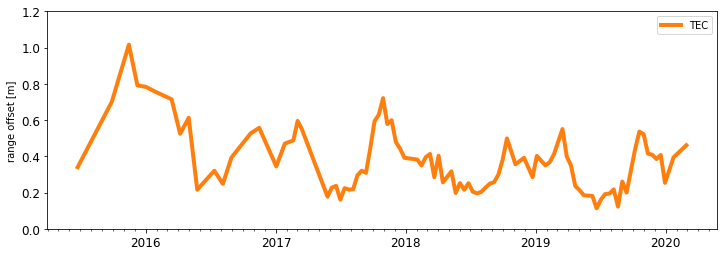

In [5]:
## plot
fig, ax = plt.subplots(figsize=figsize)
ax.plot(tec_dict['time'], tec_dict['range_delay4Cband_TEC'], linewidth=4, color='C1', label='TEC')
pp.auto_adjust_xaxis_date(ax, tec_dict['time'], every_year=1, buffer_year=None)
ax.set_ylabel('range offset [m]')
ax.set_ylim(0, 1.2)
plt.legend()

# output
out_fig = os.path.join(os.path.dirname(out_file), 'TS_gim_tec_v{}.png'.format(version))
print('save figure to file', out_fig)
plt.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=300)
plt.show()